In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df1=pd.read_csv('combined_data.csv')
df1

,id,a,covid_status,ep,g,l_c,l_l,l_s,rU,smoker,...,ihd,bd,st,ftg,mp,loss_of_smell,cld,test_status,diarrhoea,pneumonia
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,28,healthy,y,male,India,Anantapur,Andhra Pradesh,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,25,healthy,y,male,India,BENGALURU URBAN,Karnataka,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,28,healthy,y,female,United States,Pittsburgh,Pennsylvania,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,26,healthy,y,male,India,Bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,32,healthy,y,male,India,Nalanda,Bihar,n,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1767,aH6o5lYN6vh40RCFhfyBYjkQVH13,33,healthy,y,male,India,24pgs,West Bengal,n,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,na,NaN,NaN
1768,hRMSJF9xD6h9CmQJzB3phXKNnTI2,42,recovered_full,y,male,India,Bangalore,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,True,NaN,NaN,p,NaN,NaN
1769,ZNTuppbDaCNybeDYGmyjJeYr93s1,27,healthy,y,female,India,NaN,Karnataka,n,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,na,NaN,NaN
1770,J7R2UkId7jU0aOSw5amaS8zJVIm1,37,healthy,y,male,India,NaN,Karnataka,n,NaN,...,NaN,NaN,NaN,NaN,NaN,True,NaN,na,NaN,NaN


In [2]:
import librosa,librosa.display
import soundfile as sf


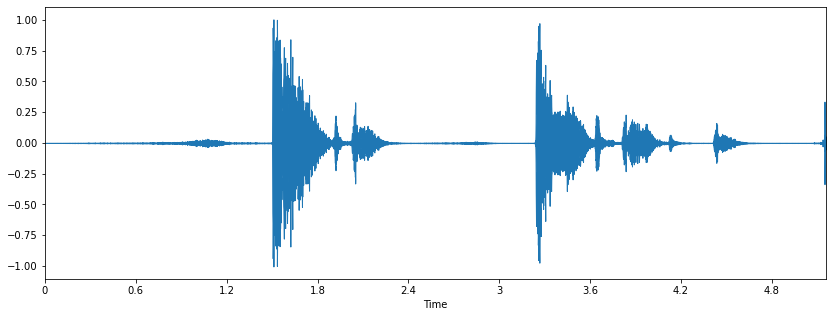

In [3]:
x,sr=librosa.load('1_Negativo_34_f_17-6-20_1.wav',sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveplot(x, sr=sr)


In [3]:
import os
import glob
import itertools
from playsound import playsound
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
from librosa.feature import melspectrogram
from librosa.util import normalize
from librosa.display import waveplot
import json
from tqdm import tqdm

In [51]:
path_wav="/home/bharath/Documents/minor_project/Coswara-Data-master/Extracted_data/"

In [54]:
df_cos_1 = pd.DataFrame(columns=["ID","Age","Covid_status","Gender", "wav_path"])

In [55]:
ages = []
cov_stat = []
genders = []
wav_paths = []
IDs=[]
fol_1=os.listdir(path_wav)
fol_1.sort()
for fol in fol_1:
    fol_2=os.listdir(path_wav+fol+'/')
    fol_2.sort()
    for ID in fol_2:
        full_wav_path=path_wav+fol+'/'+ID+'/'+'cough-heavy.wav'
        wav_paths.append(full_wav_path)
        with open(path_wav+fol+'/'+ID+'/'+'metadata.json') as json_file:
            data = json.load(json_file)
            ages.append(data['a'])
            cov_stat.append(data['covid_status'])
            genders.append(data['g'])
            IDs.append(ID)
df_cos_1['ID']=IDs
df_cos_1['Age'] = ages
df_cos_1['Covid_status'] = cov_stat
df_cos_1['Gender'] = genders
df_cos_1['wav_path'] = wav_paths
maps = {
            "healthy":"Negative",
            "no_resp_illness_exposed":"Negative",
            "positive_moderate":"Positive",
            "positive_asymp":"Positive",
            "positive_mild":"Positive",
            "recovered_full":"Negative",
            "resp_illness_not_identified":"Unknown"
           }
df_cos_1['Covid_status'] = df_cos_1['Covid_status'].map(maps)


df_cos_1['Covid_status'].value_counts()



Negative    1498
Positive     185
Unknown       89
Name: Covid_status, dtype: int64

<ipython-input-16-127c1e01c7dd>:7: UserWarning: Only one segment is calculated since parameter NFFT (=2048) >= signal length (=0).
  plt.specgram(data, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='inferno', sides='default', mode='default', scale='dB');


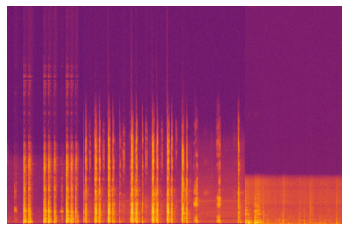

In [16]:
#THIS IS THE CODE TO GENERATE SPECTROGRAM
# RUN THIS ONLY ONCE



#from tqdm import tqdm
#spec_path='/home/bharath/Documents/minor_project/spectrograms/'
#wavpaths=df_cos['wav_path']
#ids=df_cos['ID']
#for i in tqdm(range(len(wavpaths))):
 #   data,sr=librosa.load(wavpaths[i],mono=True,sr=None)
  #  plt.specgram(data, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap='inferno', sides='default', mode='default', scale='dB');
   # plt.axis('off');
    #plt.savefig(spec_path+ids[i]+'.png')
    

In [58]:
d,sr=librosa.load(wav_paths[0],mono=True)
rmse = librosa.feature.rms(y=d)
chroma_stft = librosa.feature.chroma_stft(y=d, sr=sr)
spec_cent = librosa.feature.spectral_centroid(y=d, sr=sr)
spec_bw = librosa.feature.spectral_bandwidth(y=d, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=d, sr=sr)
zcr = librosa.feature.zero_crossing_rate(d)
mfcc = librosa.feature.mfcc(y=d, sr=sr)  
mfcc.shape

(20, 225)

In [74]:
#THIS IS THE CODE TO GENERATE DATAFRAME WITH FEATURES TO APPLY FOR ANN
#RUN THIS ONLY ONCE



# from tqdm import tqdm
# header = 'filename ID chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'
# for x in range(1, 21):
#     header += f" mfcc{x}"
# header += ' label'
# headers = header.split()
# feature_df=pd.DataFrame(columns=headers)


# for i in tqdm(range(len(df_cos_1))):
#     try:
#         d,sr=librosa.load(wav_paths[i],mono=True)
#         rmse = librosa.feature.rms(y=d)
#         chroma_stft = librosa.feature.chroma_stft(y=d, sr=sr)
#         spec_cent = librosa.feature.spectral_centroid(y=d, sr=sr)
#         spec_bw = librosa.feature.spectral_bandwidth(y=d, sr=sr)
#         rolloff = librosa.feature.spectral_rolloff(y=d, sr=sr)
#         zcr = librosa.feature.zero_crossing_rate(d)
#         mfcc = librosa.feature.mfcc(y=d, sr=sr)  
#         to_append = f'{wav_paths[i]} {IDs[i]} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}' 
#         for k in mfcc:
#             to_append += f' {np.mean(k)}'
#         to_append += f' {cov_stat[i]}'
#         feature_df.loc[i]=to_append.split()
#     except:
#         continue
# feature_df.to_csv('feature_df.csv')
    



            

100%|██████████| 1772/1772 [20:09<00:00,  1.46it/s]


In [75]:
feature_df.to_csv('feature_df.csv')
    

In [4]:
feature_df1=pd.read_csv('feature_df.csv')
feature_df1

,Unnamed: 0,filename,ID,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0,/home/bharath/Documents/minor_project/Coswara-...,0Rlzhiz6bybk77wdLjxwy7yLDhg1,0.487363,0.027569,2470.967412,2517.814026,5379.424805,0.203021,-462.127197,...,-1.103547,-0.880837,-7.490606,-1.588393,-3.186440,-2.744413,-2.226262,-3.944690,-0.808605,no_resp_illness_exposed
1,1,/home/bharath/Documents/minor_project/Coswara-...,0zexHIcM7tQDdnFiEj2Eb0v3g212,0.547617,0.107162,1940.498072,1813.820437,3693.147479,0.215175,-324.389374,...,-8.520887,-6.950836,-6.598480,-4.847742,-5.417847,-6.834573,-3.456784,-6.699997,-3.686547,healthy
2,2,/home/bharath/Documents/minor_project/Coswara-...,1AuoEhB8vAfCtxTFFV0W916yBqA3,0.514773,0.017643,2579.095729,2179.958408,5152.092575,0.214020,-476.986115,...,-2.425081,2.609728,-6.330436,-3.861457,-8.274412,-1.362872,-1.068926,-3.095093,-5.271952,healthy
3,3,/home/bharath/Documents/minor_project/Coswara-...,1ctsxp37dWNbCbizTioZzpAWqJx2,0.450089,0.071343,3155.851489,2493.776313,5913.285925,0.223205,-300.117065,...,-1.413210,-3.646290,-10.951367,-2.503790,-3.314369,-13.047846,-4.500897,-9.916449,-2.619344,healthy
4,4,/home/bharath/Documents/minor_project/Coswara-...,2TkAK2YVkYS7Ux3hAPBUgYgg9DI3,0.408882,0.033162,2690.356522,1928.754665,4653.493423,0.251088,-456.970795,...,-8.608671,1.258676,-5.317297,1.863027,-2.633213,3.165513,-6.824652,0.384505,-1.032386,healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,1767,/home/bharath/Documents/minor_project/Coswara-...,poQ11Wmw16VIjjkc6dAPeAWzf962,0.433225,0.076216,2221.983003,1921.750911,4468.890807,0.179044,-363.145935,...,-11.172530,-3.374198,-5.004271,-4.099576,-0.226029,-6.339697,-0.883040,-3.747492,-5.963787,positive_asymp
1741,1768,/home/bharath/Documents/minor_project/Coswara-...,t0IcY0l4PcU8VicMlC1xC3taL2E2,0.480486,0.038903,2200.016577,2011.394737,4242.583519,0.141155,-351.391724,...,-6.916527,-7.300231,-9.792745,-11.759289,-5.760458,-7.454152,-7.579600,-5.794465,-3.166620,positive_moderate
1742,1769,/home/bharath/Documents/minor_project/Coswara-...,wNyhOMMuX3Yo8ntJrq4zGjnpcXk2,0.251965,0.020257,1299.377036,1098.850044,2388.576744,0.102642,-473.469238,...,-4.254105,-9.239409,-9.212125,-0.390240,-6.198088,-6.797496,-0.304594,-0.291965,-7.052453,recovered_full
1743,1770,/home/bharath/Documents/minor_project/Coswara-...,wV7x1QU1gFOwMAyp8ZnHNcAsntv2,0.435976,0.086391,2908.059790,2065.660246,5301.453703,0.299982,-279.686646,...,-12.590389,3.034466,-0.021595,4.900113,-3.080751,-3.302820,-15.081415,-3.815409,-7.292781,recovered_full


In [59]:
feature_df2=feature_df1.replace(0,np.nan)
feature_df3=feature_df2.drop(feature_df2.columns[0],axis=1)
feature_df4=feature_df3.dropna()
feature_df5=feature_df4.reset_index()
feature_df6=feature_df5.drop(columns=['filename','ID'])

maps = {
            "healthy":"Negative",
            "no_resp_illness_exposed":"Negative",
            "positive_moderate":"Positive",
            "positive_asymp":"Positive",
            "positive_mild":"Positive",
            "recovered_full":"Negative",
            "resp_illness_not_identified":"Unknown"
           }
feature_df6['label'] = feature_df6['label'].map(maps)
feature_df6=feature_df6[~feature_df6['label'].str.contains("Unknown")]
feature_df6=feature_df6.reset_index()
feature_df6=feature_df6.drop(columns=['level_0','index'])




map_dict = {"Positive":'1', "Negative":'0'}


feature_df6['label'] = feature_df6['label'].map(map_dict)


feature_df6 = feature_df6.applymap(float)
feature_df6['label']=feature_df6['label'].astype(int)
feature_df6





,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.487363,0.027569,2470.967412,2517.814026,5379.424805,0.203021,-462.127197,26.567822,-1.496107,8.486549,...,-1.103547,-0.880837,-7.490606,-1.588393,-3.186440,-2.744413,-2.226262,-3.944690,-0.808605,0
1,0.547617,0.107162,1940.498072,1813.820437,3693.147479,0.215175,-324.389374,66.750031,-23.648458,-2.405120,...,-8.520887,-6.950836,-6.598480,-4.847742,-5.417847,-6.834573,-3.456784,-6.699997,-3.686547,0
2,0.514773,0.017643,2579.095729,2179.958408,5152.092575,0.214020,-476.986115,49.056728,-11.033867,7.655618,...,-2.425081,2.609728,-6.330436,-3.861457,-8.274412,-1.362872,-1.068926,-3.095093,-5.271952,0
3,0.450089,0.071343,3155.851489,2493.776313,5913.285925,0.223205,-300.117065,33.329739,-16.823326,-7.083731,...,-1.413210,-3.646290,-10.951367,-2.503790,-3.314369,-13.047846,-4.500897,-9.916449,-2.619344,0
4,0.408882,0.033162,2690.356522,1928.754665,4653.493423,0.251088,-456.970795,36.253540,-12.572351,4.509708,...,-8.608671,1.258676,-5.317297,1.863027,-2.633213,3.165513,-6.824652,0.384505,-1.032386,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1635,0.433225,0.076216,2221.983003,1921.750911,4468.890807,0.179044,-363.145935,57.326748,-15.492296,8.467134,...,-11.172530,-3.374198,-5.004271,-4.099576,-0.226029,-6.339697,-0.883040,-3.747492,-5.963787,1
1636,0.480486,0.038903,2200.016577,2011.394737,4242.583519,0.141155,-351.391724,62.613510,-18.033426,-6.336644,...,-6.916527,-7.300231,-9.792745,-11.759289,-5.760458,-7.454152,-7.579600,-5.794465,-3.166620,1
1637,0.251965,0.020257,1299.377036,1098.850044,2388.576744,0.102642,-473.469238,32.092010,-10.902599,13.831336,...,-4.254105,-9.239409,-9.212125,-0.390240,-6.198088,-6.797496,-0.304594,-0.291965,-7.052453,0
1638,0.435976,0.086391,2908.059790,2065.660246,5301.453703,0.299982,-279.686646,39.633575,-54.781059,12.410981,...,-12.590389,3.034466,-0.021595,4.900113,-3.080751,-3.302820,-15.081415,-3.815409,-7.292781,0


In [61]:
columns = feature_df6.columns.tolist()
columns_1 = [c for c in columns if c not in ["label"]]
target = "label"
X = feature_df6[columns_1]
Y = feature_df6[target]
p = feature_df6[feature_df6['label']==1]
n=feature_df6[feature_df6['label']==0]

print(p.shape,n.shape)

(185, 27) (1455, 27)


In [64]:
import sklearn
import numpy as np

import scipy
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
smk = SMOTE()
X_res,y_res=smk.fit_resample(X,Y)
X_res.shape,y_res.shape
n_p=y_res[y_res==1]
n_n=y_res[y_res==0]
print(n_p.shape,n_n.shape)




(1455,) (1455,)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import keras
from keras import layers 
from keras.models import Sequential 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3)

In [45]:
model = Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])
clf = model.fit(X_train, 
                y_train, 
                epochs=1200, 
                batch_size=64, 
                validation_data=(X_test, y_test))

Epoch 1/1200
32/32 [==============================] - 1s 9ms/step - loss: 76.1995 - accuracy: 0.3821 - val_loss: 22.5702 - val_accuracy: 0.4800
Epoch 2/1200
32/32 [==============================] - 0s 2ms/step - loss: 11.0144 - accuracy: 0.5216 - val_loss: 11.1667 - val_accuracy: 0.4800
Epoch 3/1200
32/32 [==============================] - 0s 3ms/step - loss: 10.3502 - accuracy: 0.5090 - val_loss: 17.4952 - val_accuracy: 0.4788
Epoch 4/1200
32/32 [==============================] - 0s 3ms/step - loss: 8.6958 - accuracy: 0.5194 - val_loss: 1.5678 - val_accuracy: 0.5785
Epoch 5/1200
32/32 [==============================] - 0s 2ms/step - loss: 3.6574 - accuracy: 0.5620 - val_loss: 5.7841 - val_accuracy: 0.5418
Epoch 6/1200
32/32 [==============================] - 0s 2ms/step - loss: 4.5211 - accuracy: 0.5485 - val_loss: 13.0715 - val_accuracy: 0.4777
Epoch 7/1200
32/32 [==============================] - 0s 2ms/step - loss: 14.9304 - accuracy: 0.5088 - val_loss: 6.2513 - val_accuracy: 0.480

In [46]:
core = model.evaluate(X_test, 
                       y_test, 
                      batch_size=16,
                      steps=9)

9/9 [==============================] - 0s 974us/step - loss: 0.2845 - accuracy: 0.9167


In [47]:
y_pred = model.predict_classes(X_test)
cm = confusion_matrix(y_test, y_pred)
def plot_confusion_matrix(cm):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Negative','Positive']
    plt.title('COVID-19 Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.savefig("./img/Fig6_Confusion_Matrix_50_epochs.png")
    plt.show()

/home/bharath/.local/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


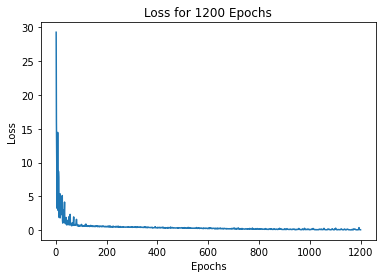

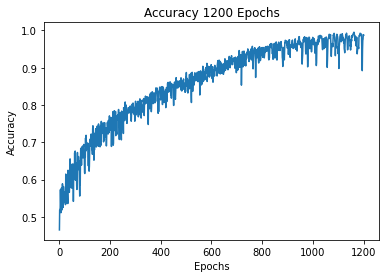


 **Confusion Matrix**



/home/bharath/.local/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


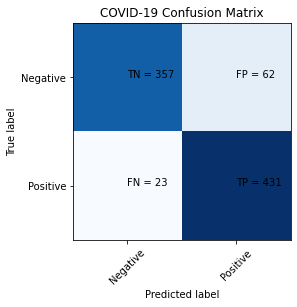


 **Classification Report**

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       419
           1       0.87      0.95      0.91       454

    accuracy                           0.90       873
   macro avg       0.91      0.90      0.90       873
weighted avg       0.91      0.90      0.90       873



In [49]:
def plot_loss_accuracy(clf):
    loss_clf = clf.history['loss']
    acc_clf = clf.history['accuracy']
    epoch_range = list(range(1, 1201))

    plt.figure()
    plt.plot(epoch_range, loss_clf)
    plt.title(f"Loss for {len(epoch_range)} Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.savefig("./img/Fig4_Loss_Per_50_Epochs.png")


    plt.figure()
    plt.plot(epoch_range, acc_clf)
    plt.title(f"Accuracy {len(epoch_range)} Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.savefig("./img/Fig5_Accuracy_per_50_epochs.png")
    plt.show()
    
    y_pred = model.predict_classes(X_test)
    print("\n **Confusion Matrix**\n")
    #print(confusion_matrix(y_test, y_pred))
    plot_confusion_matrix(cm)
    print("\n **Classification Report**\n")
    print(classification_report(y_test, y_pred))

plot_loss_accuracy(clf)    